In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [24]:
# df for apple
df = pd.read_csv("./data/aapl.csv", index_col="Date", parse_dates=True)

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371567,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200


In [26]:
df['pct_change'] = (df['Close'] - df['Close'].shift(1))/ df['Close'].shift(1)
df['log_change'] = np.log(df['Close']/ df['Close'].shift(1))

In [28]:
from tool import technical_generator
Generator = technical_generator.Generator()

# Moving Average
df['7ema'] = Generator.EMA(df['Close'], 7)
df['14ema'] = Generator.EMA(df['Close'], 14)
df['21ema'] = Generator.EMA(df['Close'], 21)
df['5sma'] = Generator.SMA(df['Close'],5)
df['10sma'] = Generator.SMA(df['Close'],10)

# RASD - Rolling Average Standard Deviation 
df['5rasd'] = Generator.RASD(df['Close'], 5)
df['10rasd'] = Generator.RASD(df['Close'], 10)

# MACD calculations 
df['7macd'] = Generator.MACD(df['Close'], 3, 11, 7)[0]  # Only taking the MACD value
df['14macd'] = Generator.MACD(df['Close'], 7, 21, 14)[0]

# RSI calculations 
df['7rsi'] = Generator.RSI(df['Close'], 7)
df['14rsi'] = Generator.RSI(df['Close'], 14)
df['21rsi'] = Generator.RSI(df['Close'], 21)

# ATR calculations 
df['7atr'] = Generator.ATR(df['High'], df['Low'], df['Close'], 7)
df['14atr'] = Generator.ATR(df['High'], df['Low'], df['Close'], 14)
df['21atr'] = Generator.ATR(df['High'], df['Low'], df['Close'], 21)

# Bollinger Bands calculations 
df['7upper'], df['7lower'] = Generator.BollingerBands(df['Close'], 7)
df['14upper'], df['14lower'] = Generator.BollingerBands(df['Close'], 14)
df['21upper'], df['21lower'] = Generator.BollingerBands(df['Close'], 21)

# Momentum (MTM) calculations 
df['1mtm'] = Generator.MOM(df['Close'], 1)
df['3mtm'] = Generator.MOM(df['Close'], 3)

# Rate of Change (ROC) calculation 
df['60roc'] = Generator.ROC(df['Close'], 60)

# Raw Stochastic Value (RSV)
df['7rsv'] = Generator.RSV(df['Close'], 7)
df['14rsv'] = Generator.RSV(df['Close'], 14)
df['21rsv'] = Generator.RSV(df['Close'], 21)

# 9.WPR : william percent range (Williams' %R)
df['15wpr'] = Generator.WILLR(df['High'], df['Low'], df['Close'], 14)

# Commodity Channel Index (CCI) 
df['14cci'] = Generator.CCI(df['High'], df['Low'], df['Close'], 14)

#Next return
df['next_rtn'] = df['Close'] / df['Open'] -1



In [29]:
df

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21lower,1mtm,3mtm,60roc,7rsv,14rsv,21rsv,15wpr,14cci,next_rtn
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371567,352410800,NaN,NaN,7.526071,7.526071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011261
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,0.015565,0.015445,7.555357,7.541690,...,NaN,0.117143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002718
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.001729,0.001727,7.580625,7.556989,...,NaN,0.013215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001025
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000,-0.015906,-0.016034,7.569129,7.554009,...,NaN,-0.121786,0.008572,NaN,NaN,NaN,NaN,NaN,NaN,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200,-0.001849,-0.001850,7.557026,7.549570,...,NaN,-0.013929,-0.122500,NaN,NaN,NaN,NaN,NaN,NaN,-0.005525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200,0.013585,0.013494,173.707135,174.630108,...,165.901298,2.360001,3.080002,-9.623774,100.000000,60.255335,46.063787,-46.093783,34.450834,0.009981
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100,0.014709,0.014602,174.947851,175.168760,...,165.979284,2.589996,6.050003,-8.223749,100.000000,90.712897,62.914777,-15.448519,97.894449,0.016788
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300,-0.040857,-0.041716,174.053387,174.662258,...,165.654935,-7.300003,-2.350006,-11.482443,3.182897,24.508744,15.419622,-71.709315,11.881530,-0.032081


In [30]:
df = df.dropna()

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21lower,1mtm,3mtm,60roc,7rsv,14rsv,21rsv,15wpr,14cci,next_rtn
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-30,8.450000,8.481429,8.366071,8.423214,7.131088,527310000,0.014889,0.014779,8.227855,8.094737,...,7.479966,0.123571,0.328571,11.920468,100.0000,100.000000,100.00000,-9.405788,152.679963,-0.003170
2010-03-31,8.410357,8.450357,8.373571,8.392857,7.105389,430659600,-0.003604,-0.003611,8.269106,8.134486,...,7.555074,-0.030357,0.146427,9.807947,90.7608,93.749951,96.79485,-14.310610,115.238857,-0.002081
2010-04-01,8.478929,8.526071,8.312500,8.427500,7.134716,603145200,0.004128,0.004119,8.308704,8.173554,...,7.642077,0.034643,0.127857,10.070896,100.0000,100.000000,100.00000,-14.854614,101.262030,-0.006065
2010-04-05,8.392143,8.518214,8.384643,8.517500,7.210911,684507600,0.010679,0.010623,8.360903,8.219414,...,7.725689,0.090000,0.094286,13.044503,100.0000,100.000000,100.00000,-1.291599,101.061564,0.014937
2010-04-06,8.507143,8.580000,8.464286,8.555000,7.242657,447017200,0.004403,0.004393,8.409427,8.264159,...,7.742865,0.037500,0.162144,13.752504,100.0000,100.000000,100.00000,-3.484269,102.139991,0.005626


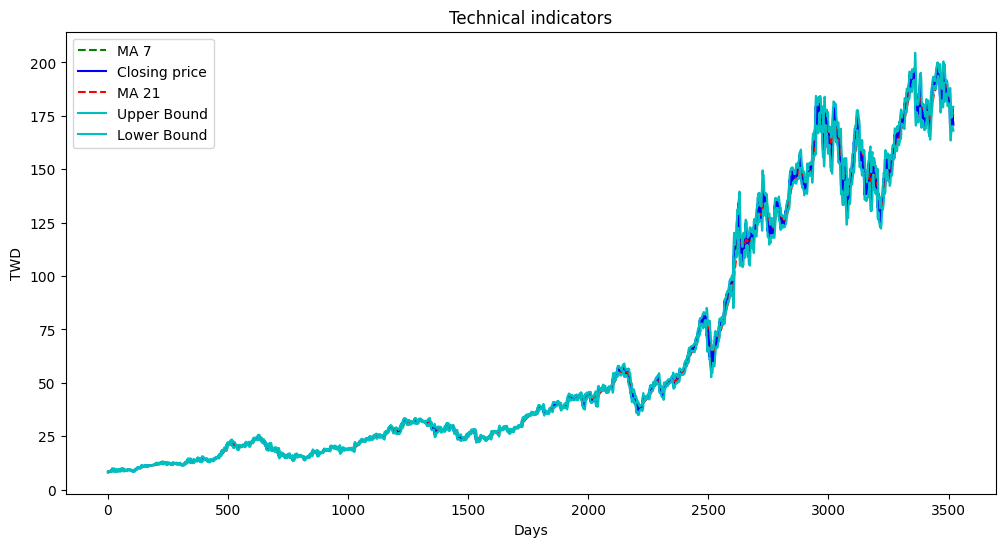

In [32]:
x_ = np.arange(df.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(df['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(df['Close'].values, label = 'Closing price', color = 'b')
plt.plot(df['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(df['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(df['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, df['7lower'].values, df['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()

/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_54009/3713128327.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
/Users/juwon/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/juwon/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_54009/3713128327.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

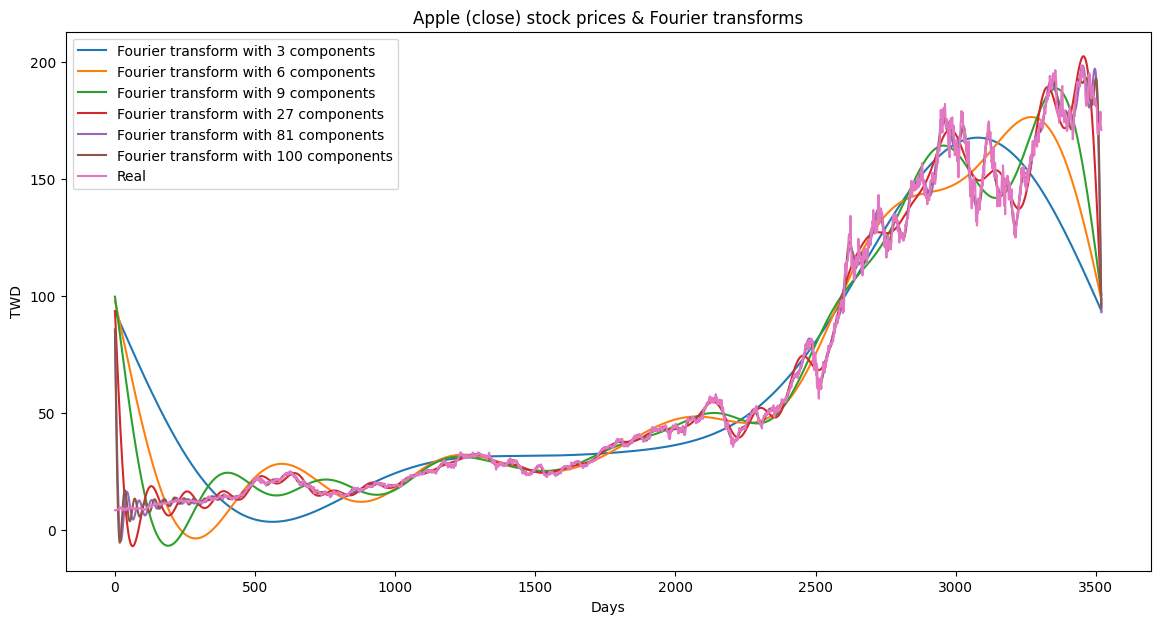

In [33]:
# Fourier transform 
close_fft = np.fft.fft(np.asarray(df['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    df[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(df['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('Apple (close) stock prices & Fourier transforms')
plt.legend()
plt.show() 

In [34]:
df['FT_3components'] = df['FT_3components'].astype('float')
df['FT_6components'] = df['FT_6components'].astype('float')
df['FT_9components'] = df['FT_9components'].astype('float')
df['FT_27components'] = df['FT_27components'].astype('float')
df['FT_81components'] = df['FT_81components'].astype('float')
df['FT_100components'] = df['FT_100components'].astype('float')
df.head()

/Users/juwon/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_54009/691771012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FT_3components'] = df['FT_3components'].astype('float')
/Users/juwon/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/var/folders/9c/nflqrr9131d0fbbm5r8_024r0000gn/T/ipykernel_54009/691771012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21rsv,15wpr,14cci,next_rtn,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-30,8.450000,8.481429,8.366071,8.423214,7.131088,527310000,0.014889,0.014779,8.227855,8.094737,...,100.00000,-9.405788,152.679963,-0.003170,93.433003,97.928200,99.677426,93.496539,85.442800,85.716090
2010-03-31,8.410357,8.450357,8.373571,8.392857,7.105389,430659600,-0.003604,-0.003611,8.269106,8.134486,...,96.79485,-14.310610,115.238857,-0.002081,93.162923,97.374329,98.756406,90.741494,77.927574,76.665885
2010-04-01,8.478929,8.526071,8.312500,8.427500,7.134716,603145200,0.004128,0.004119,8.308704,8.173554,...,100.00000,-14.854614,101.262030,-0.006065,92.892805,96.819954,97.834811,87.992607,70.530080,67.764691
2010-04-05,8.392143,8.518214,8.384643,8.517500,7.210911,684507600,0.010679,0.010623,8.360903,8.219414,...,100.00000,-1.291599,101.061564,0.014937,92.622653,96.265100,96.912734,85.252036,63.297895,59.099408
2010-04-06,8.507143,8.580000,8.464286,8.555000,7.242657,447017200,0.004403,0.004393,8.409427,8.264159,...,100.00000,-3.484269,102.139991,0.005626,92.352470,95.709791,95.990265,82.521923,56.276628,50.753147


In [35]:
df.to_csv('./data/data.csv')